In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import numpy as np
import os
import cv2
import tensorflow as tf
import tensorflow_datasets as tfds


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data_dir = '/kaggle/input/flowers-recognition/flowers'
labels = ['daisy','dandelion','rose','sunflower','tulip']
x = []
y = []
for label in labels:
    data = os.path.join(data_dir,label)
    for image in os.listdir(data):
        try:
            im = cv2.imread(os.path.join(data,image),cv2.IMREAD_COLOR)
            im = cv2.resize(im,(128,128))
            # Using the Canny filter with different parameters
            
            x.append(im)
            y.append(labels.index(label))
            
            
        except Exception as e:
            pass


In [3]:
np.unique(y)

array([0, 1, 2, 3, 4])

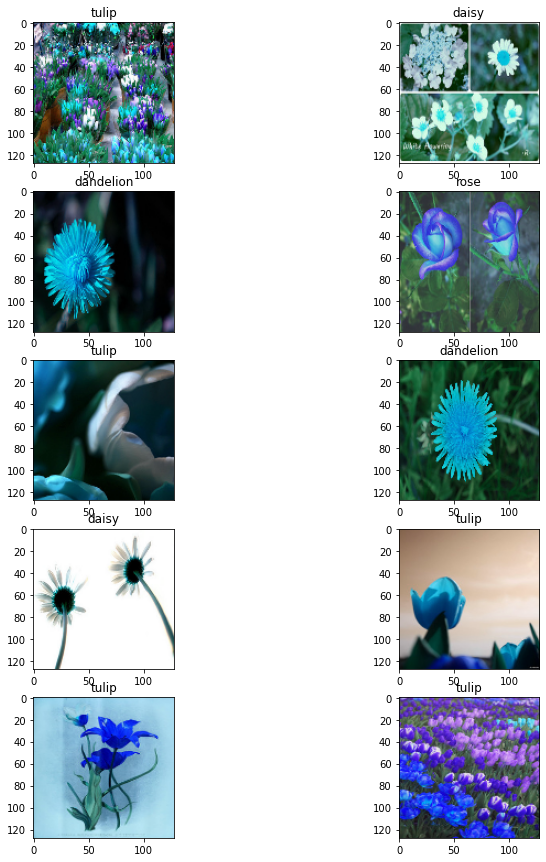

In [4]:
import matplotlib.pyplot as plt
import random
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(12,15)
for i in range(5):
    for j in range(2):
        ran =random.randint(0,len(x))
        ax[i, j].imshow(x[ran])
        ax[i, j].set_title(labels[y[ran]])

In [5]:
x = np.array(x)/255.0
y = np.array(y)
x =x.reshape(-1,128,128,3)
y= y.reshape(-1,1)
y= tf.keras.utils.to_categorical(y,5,)

In [6]:
datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
fill_mode= 'nearest',
horizontal_flip=False,
vertical_flip=False,
shear_range=0.1,
zoom_range = 0.1, # Randomly zoom image 
width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
height_shift_range=0.2
)
datagenerator.fit(x)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(5,5),padding ='same',strides=(2,2),activation='relu',input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(512,(5,5),padding ='same',strides=(2,2),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(5,activation='softmax')
])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         819456    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 512)         3

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)

In [12]:
history =model.fit(datagenerator.flow(x_train,y_train,batch_size=32),epochs=20,callbacks=[earlystop],validation_data=datagenerator.flow(x_test,y_test))

Epoch 1/20
102/102 [==============================] - 16s 160ms/step - loss: 1.4583 - accuracy: 0.3304 - val_loss: 1.3033 - val_accuracy: 0.4200
Epoch 2/20
102/102 [==============================] - 17s 163ms/step - loss: 1.3225 - accuracy: 0.3924 - val_loss: 1.2861 - val_accuracy: 0.4422
Epoch 3/20
102/102 [==============================] - 16s 159ms/step - loss: 1.2084 - accuracy: 0.4732 - val_loss: 1.1267 - val_accuracy: 0.5291
Epoch 4/20
102/102 [==============================] - 17s 164ms/step - loss: 1.0943 - accuracy: 0.5577 - val_loss: 1.0215 - val_accuracy: 0.5846
Epoch 5/20
102/102 [==============================] - 16s 159ms/step - loss: 0.9880 - accuracy: 0.6169 - val_loss: 0.9289 - val_accuracy: 0.6207
Epoch 6/20
102/102 [==============================] - 17s 165ms/step - loss: 0.9588 - accuracy: 0.6317 - val_loss: 0.9869 - val_accuracy: 0.6022
Epoch 7/20
102/102 [==============================] - 16s 157ms/step - loss: 0.9288 - accuracy: 0.6437 - val_loss: 0.9444 - val_ac

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


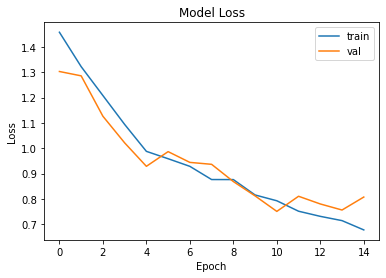

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'],loc='upper_right')



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


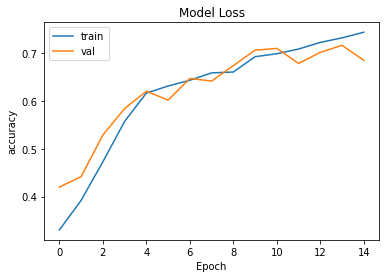

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'],loc='upper_right')

In [15]:
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Accuracy on train set is %f" %(train_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(test_acc * 100)  + "%")

34/34 [==============================] - 0s 8ms/step - loss: 0.7508 - accuracy: 0.7049
Accuracy on train set is 74.429363%
Accuracy on validation set is 70.490289%


In [16]:
from tensorflow.keras.applications import VGG19
vgg = VGG19(include_top=False,weights = 'imagenet',classes=5,input_shape=(128,128,3))

for layer in vgg.layers[:17]:
    layer.trainable=False

from keras.regularizers import l2    
model = tf.keras.Sequential()
model.add(vgg)
model.add(tf.keras.layers.Conv2D(128,(5,5),padding ='same',strides=(2,2),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(256,(5,5),padding ='same',strides=(2,2),activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(5,activation='softmax'))

80142336/80134624 [==============================] - 2s 0us/step


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 128)         1638528   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 256)         819456    
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 22,483,653
Trainable params: 11,898,501
Non-trainable params: 10,585,152
_________________________________

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
history =model.fit(datagenerator.flow(x_train,y_train,batch_size=64),steps_per_epoch=len(x_train) / 64,epochs=20,callbacks=[earlystop],validation_data=datagenerator.flow(x_test,y_test))

Epoch 1/20
51/50 [==============================] - 18s 356ms/step - loss: 1.6588 - accuracy: 0.2316 - val_loss: 1.6040 - val_accuracy: 0.2211
Epoch 2/20
51/50 [==============================] - 19s 364ms/step - loss: 1.5883 - accuracy: 0.2613 - val_loss: 1.5364 - val_accuracy: 0.4006
Epoch 3/20
51/50 [==============================] - 17s 330ms/step - loss: 1.3827 - accuracy: 0.4035 - val_loss: 1.1377 - val_accuracy: 0.4838
Epoch 4/20
51/50 [==============================] - 18s 359ms/step - loss: 1.1122 - accuracy: 0.5022 - val_loss: 0.9829 - val_accuracy: 0.5893
Epoch 5/20
51/50 [==============================] - 17s 339ms/step - loss: 0.8470 - accuracy: 0.6582 - val_loss: 0.7308 - val_accuracy: 0.6966
Epoch 6/20
51/50 [==============================] - 18s 356ms/step - loss: 0.6854 - accuracy: 0.7471 - val_loss: 0.7215 - val_accuracy: 0.7419
Epoch 7/20
51/50 [==============================] - 18s 349ms/step - loss: 0.5740 - accuracy: 0.7887 - val_loss: 0.5721 - val_accuracy: 0.7993

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


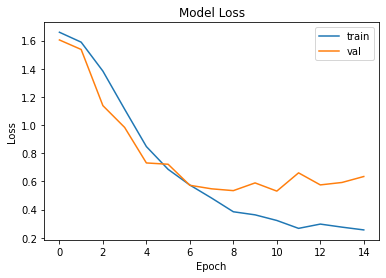

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'],loc='upper_right')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


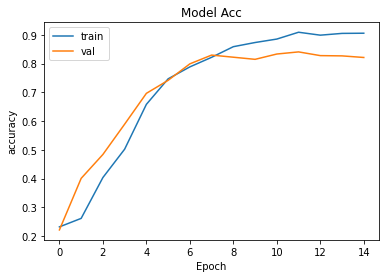

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Acc')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'],loc='upper_right')

In [22]:
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Accuracy on train set is %f" %(train_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(test_acc * 100)  + "%")

34/34 [==============================] - 1s 28ms/step - loss: 0.5139 - accuracy: 0.8474
Accuracy on train set is 91.579270%
Accuracy on validation set is 84.736353%


In [23]:
#As we can see pre-trained model is much accurate.